In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
crops = ['Corn', 'Soybean', "Wheat", "Rice"]
phases = [1,2]

In [4]:
# Read in the region_yield_reduction
crop_yield_reduction = pd.read_excel(".." + os.sep + "reports" + os.sep + "Prediction_statistics.xlsx", sheet_name = "Prediction_statistics")
# Only keep the first three columns
crop_yield_reduction = crop_yield_reduction.iloc[:,0:3]
# Rename the columns
crop_yield_reduction.columns = ["Crop", "Phase", 'Yield Reduction (%)']
# Forwardfill the crop column
crop_yield_reduction['Crop'] = crop_yield_reduction['Crop'].fillna(method = 'ffill')
# Only keep the rows with RelativeChange_phase1 and Relative_Change_phase2 in column Unnamed: 1
crop_yield_reduction = crop_yield_reduction[crop_yield_reduction["Phase"].isin(["RelativeChange_phase1", "Relative_Change_phase2"])]
# Only keep the numbers from the phase column
crop_yield_reduction["Phase"] = crop_yield_reduction["Phase"].str.extract('(\d+)', expand=False)
# Multiply the yield reduction by 100
crop_yield_reduction["Yield Reduction (%)"] = crop_yield_reduction["Yield Reduction (%)"] * 100
crop_yield_reduction
# Remove the ones from phase 1
crop_yield_reduction = crop_yield_reduction[crop_yield_reduction["Phase"] != "1"]

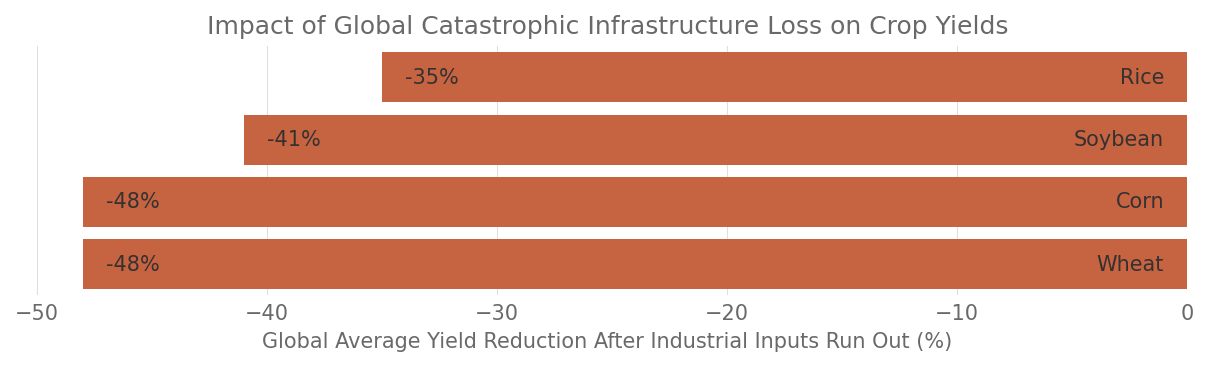

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up the figure and subplots
order = ["Rice", "Soybean", "Corn", "Wheat"]
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

g = sns.catplot(
    data=crop_yield_reduction,
    y='Crop',
    x='Yield Reduction (%)',
    hue='Phase',
    kind='bar',
    height=4,
    palette=['#DC582A'],
    order=order,
    legend=False,
)

g.set(yticklabels=[])  # Remove y-axis labels

for ax in g.axes.flat:
    # Hide borders
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_ylabel('')  # Remove y-labels
    ax.set_xlabel('Global Average Yield Reduction After Industrial Inputs Run Out (%)')
    ax.set_title("Impact of Global Catastrophic Infrastructure Loss on Crop Yields", fontsize=12)

fig = plt.gcf()
fig.set_size_inches(11, 2)

# Show the plot with labels centered both horizontally and vertically in the middle of each bar
for i, p in enumerate(g.ax.patches):
    width = p.get_width()
    crop = order[i % len(order)]
    label = f'{crop}'
    x_coord_label = -1  # x-coordinate for the label
    y_coord = p.get_y() + p.get_height() / 2
    plt.text(x_coord_label, y_coord, label, ha="right", va="center", color="#363131")

# Add rounded percentage at the end of each bar
for i, p in enumerate(g.ax.patches):
    width = p.get_width()
    rounded_percentage = f'{round(width)}%'  # Round the percentage to the nearest integer
    x_coord_percentage = width + 1  # Adjusted x-coordinate for the percentage
    y_coord = p.get_y() + p.get_height() / 2
    plt.text(x_coord_percentage, y_coord, rounded_percentage, ha="left", va="center", color="#363131")

plt.savefig("../" + os.sep + "reports" + os.sep + "figures" + os.sep + "yield_reduction_by_crop_ToC.png", dpi=300, bbox_inches='tight')
